# Veri Seti Hikayesi

# Barplot (sütun grafik) elimizdeki kategorik değişkenleri görselleştirmek için kullanılır

###### price: dolar cinsinde fiyat (326-18,823)
###### carat: ağırlık(0.2-5.01)
###### cut: kalite (Fair, Good, Very Good, Permium, Ideal)
###### color: renk (from j (worst) to D (best)
###### clarity: temizliği,berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best))
###### x: length in mm (0-10.74)
###### y: width in mm (0-58.9)
###### z: depth in mm (0-31.8)
###### depth: toplam detinlik yüzdesi = z/mean(x,y)= 2 * z / (x+y) (43-79)
###### table: elmasın en geniş noktasına göre genişliği (43-95)

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [8]:
#önceki konularda frekansları dediğimiz olay yani gözlenme sıklığı

In [9]:
#aşağıda kategorik değişkenleri sıralayacak fonksiyonu import ettik

In [10]:
#ordinal tanımlama (sıraya göre tanımlama)
from pandas.api.types import CategoricalDtype

In [11]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [12]:
#aşağıda df içindeki cut özelliğini kategorik olarak sıralamaya uygun formata dönüştürdük .astype modülünün
#içine import ettiğimiz bu işi yapacak fonksiyon adını yazıp çağırarak

In [13]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [14]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [15]:
#aşağıda görüldüğü üzere sıralamda terslik var bunu düzeltmek için de aşağıdaki listeyi oluşturduk

In [16]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [17]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", " Ideal"]

In [18]:
# cut_kategoriler adında oluşturduğumuz seri yapısını aşağıdaki koda uyguladık. eğer kendi içindeki sıralama
#doğru olsaydı "df.cut = df.cut.astype(CategoricalDtype(ordered = True))" şeklinde yazmamız yeterliydi.

In [19]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [20]:
df.cut.head(1)

0    NaN
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < ' Ideal']

# Barplot 

In [21]:
#yukarda irdelediğimiz cut özelliğini görselleştirdik ve .set_title("grafiğin üstüne görünmesini istediğimiz ad") yazarak düzgün hale getirebiliriz.

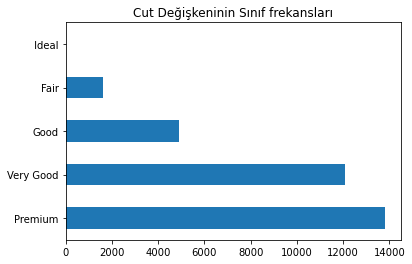

In [22]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf frekansları");

In [23]:
#fonksiyonları kısa ve düzgün şekilde gösterebilmek için en baş ve sonu parantes içinde yazarak noktadan sonraki kısımları alt alta yazabiliriz.

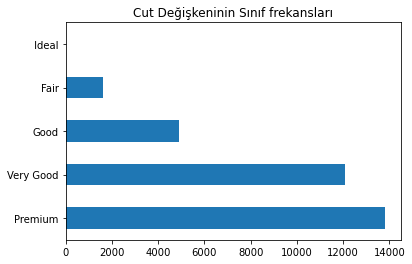

In [24]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf frekansları"));

In [25]:
#x eksenine cut değişkenini koy, y cut içinden indexleri al

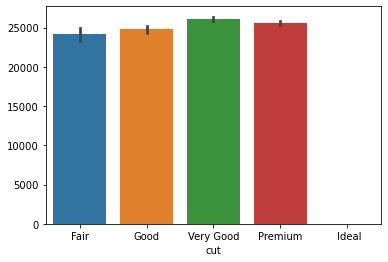

In [26]:
sns.barplot(x = "cut", y = df.cut.index,data =df);

In [ ]:
#sütun grafiğini ani barplotu yapmış olduk